In [2]:
# uv run python -m ipykernel install --user --name lamp

import matplotlib.pyplot as plt
from IPython.display import display
import lamp

stats = lamp.aggregate_results()
display(stats)

,benchmark_name_llm,example_index,num_predicates_llm,num_possible_terms_llm,num_facts_llm,num_rules_llm,total_pos_literals_llm,total_neg_literals_llm,solution_atoms_llm,num_solution_atoms_llm,...,num_facts_original,num_rules_original,total_pos_literals_original,total_neg_literals_original,solution_atoms_original,num_solution_atoms_original,rules_original,facts_original,solution_match,rules_match
0,gpt-oss:20b,0,3,3,4,1,1,0,"{d2(o1), d1(o2), d2(o0), d1(o0), d3(o2)}",5,...,4,1,1,0,"{d2(o1), d1(o2), d2(o0), d1(o0), d3(o2)}",5,[d1(X) :- d3(X).],"[d2(o0), d1(o0), d2(o1), d3(o2)]",True,True
1,gpt-oss:20b,1,3,3,4,1,1,0,"{d0(o0), d2(o2), d1(o2), d0(o1), d0(o2)}",5,...,4,1,2,0,"{d0(o0), d2(o2), d1(o2), d0(o1), d0(o2)}",5,"[d0(X) :- d1(X), d2(X).]","[d0(o1), d2(o2), d1(o2), d0(o0)]",True,False
2,gpt-oss:20b,2,3,3,4,1,1,1,"{d2(o1), d1(o2), d2(o3), d1(o3), d3(o2)}",5,...,4,1,1,1,"{d2(o1), d1(o2), d2(o3), d1(o3), d3(o2)}",5,"[d2(X) :- d1(X), not d3(X).]","[d2(o1), d3(o2), d1(o2), d1(o3)]",True,True
3,gpt-oss:20b,3,4,2,4,1,1,0,"{d2(o2), d1(o2), d1(o0), d3(o2), d0(o2)}",5,...,4,1,3,0,"{d2(o2), d1(o2), d1(o0), d0(o2), d3(o2)}",5,"[d1(X) :- d0(X), d3(X), d2(X).]","[d0(o2), d1(o0), d2(o2), d3(o2)]",True,False
4,gpt-oss:20b,4,3,2,4,1,2,0,"{d1(o2), d2(o3), d3(o3), d0(o2), d0(o3)}",5,...,4,1,2,1,"{d1(o2), d2(o3), d3(o3), d0(o2), d0(o3)}",5,"[d3(X) :- d0(X), not d1(X), d2(X).]","[d0(o3), d0(o2), d2(o3), d1(o2)]",True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,qwen3-coder:30b,115,4,3,4,4,4,0,"{d3(o4), d0(o3), d2(o3), d4(o1)}",4,...,4,2,3,0,"{d4(o1), d2(o3), d3(o4), d4(o3), d0(o3)}",5,"[d0(X) :- d4(X), d2(X)., d4(X) :- d0(X), d2(X).]","[d0(o3), d3(o4), d2(o3), d4(o1)]",False,False
356,qwen3-coder:30b,116,4,2,4,1,2,0,"{d1(o2), d2(o3), d4(o2), d3(o2), d0(o3)}",5,...,4,2,2,2,"{d1(o2), d2(o3), d4(o2), d3(o2), d0(o3)}",5,"[d1(X) :- d4(X), not d0(X)., d4(X) :- not d2(X...","[d0(o3), d2(o3), d1(o2), d3(o2)]",True,False
357,qwen3-coder:30b,117,3,2,4,4,4,0,"{d2(o1), d4(o1), d1(o1), d3(o4), d1(o4), d3(o1...",10,...,4,2,4,0,"{d1(o1), d4(o1), d3(o1), d0(o4), d0(o1)}",5,"[d0(X) :- d4(X), d1(X), d3(X)., d3(X) :- d0(X)...","[d0(o1), d4(o1), d1(o1), d0(o4)]",False,False
358,qwen3-coder:30b,118,3,3,4,2,2,2,"{d0(o0), d4(o1), d3(o1), d4(o3), d1(o0)}",5,...,4,2,3,1,"{d2(o1), d4(o1), d3(o1), d4(o3), d1(o0), d0(o1)}",6,"[d0(X) :- d4(X), not d1(X), d2(X)., d2(X) :- d...","[d1(o0), d4(o1), d3(o1), d4(o3)]",False,False


In [3]:
# llm_success = stats.groupby(["benchmark_name_llm", "total_pos_literals_llm", "total_neg_literals_llm"])["solution_match"].sum().reset_index()

stats["num_rule_diff"] = stats["num_rules_original"] - stats["num_rules_llm"]
stats["num_literals_original"] = stats["total_pos_literals_original"] + stats["total_neg_literals_original"]
stats["num_literals_llm"] = (stats["total_pos_literals_llm"] + stats["total_neg_literals_llm"])
stats["num_pred_diff"] = stats["num_literals_original"] - stats["num_literals_llm"]

literal_effects = stats.groupby(["benchmark_name_llm", "solution_match"]).agg(
    count=("benchmark_name_llm", "count"),
    count_rules_match=("rules_match", "sum")
).reset_index()

correct_count = literal_effects[literal_effects["solution_match"] == True]
correct_count = correct_count[["benchmark_name_llm", "count", "count_rules_match"]].rename(columns={
    "benchmark_name_llm": "LLM",
    "count": "Count",
    "count_rules_match": "Rules Match Count",
})
display(correct_count)

latex = correct_count.to_latex(
    index=False,
    caption="Number of Correct Answer Set Results by LLM with number where the rules match the original",
    label="tab:llm_correct",
)
print(latex)

incorrect_count = literal_effects[literal_effects["solution_match"] == False]
incorrect_count = incorrect_count[["benchmark_name_llm", "count"]].rename(columns={
    "benchmark_name_llm": "LLM",
    "count": "Number of Incorrect Answer Set Results by LLM"
})
display(incorrect_count)

latex = incorrect_count.to_latex(
    index=False,
    caption="LLM with Incorrect Answer Set Results",
    label="tab:llm_incorrect"
)
print(latex)


,LLM,Count,Rules Match Count
1,gpt-5-mini,119,11
3,gpt-oss:20b,116,11
5,qwen3-coder:30b,53,1


\begin{table}
\caption{Number of Correct Answer Set Results by LLM with number where the rules match the original}
\label{tab:llm_correct}
\begin{tabular}{lrr}
\toprule
LLM & Count & Rules Match Count \\
\midrule
gpt-5-mini & 119 & 11 \\
gpt-oss:20b & 116 & 11 \\
qwen3-coder:30b & 53 & 1 \\
\bottomrule
\end{tabular}
\end{table}



,LLM,Number of Incorrect Answer Set Results by LLM
0,gpt-5-mini,1
2,gpt-oss:20b,4
4,qwen3-coder:30b,67


\begin{table}
\caption{LLM with Incorrect Answer Set Results}
\label{tab:llm_incorrect}
\begin{tabular}{lr}
\toprule
LLM & Number of Incorrect Answer Set Results by LLM \\
\midrule
gpt-5-mini & 1 \\
gpt-oss:20b & 4 \\
qwen3-coder:30b & 67 \\
\bottomrule
\end{tabular}
\end{table}



In [4]:

rules_effects = stats.groupby(["benchmark_name_llm", "solution_match", "num_rule_diff"]).agg(
    count=("benchmark_name_llm", "count")
).reset_index()

rules_effects_correct = rules_effects[(rules_effects["solution_match"] == True) & (rules_effects["num_rule_diff"] > -3) & (rules_effects["num_rule_diff"] < 3)]
rules_effects_correct = rules_effects_correct[["benchmark_name_llm", "num_rule_diff", "count"]].rename(columns={
    ""
    "benchmark_name_llm": "LLM",
    "num_rule_diff": "Number Rules",
    "count": "Count"
})
display(rules_effects_correct)

latex = rules_effects_correct.to_latex(
    index=False,
    caption="Number of Correct Answer Set Results by LLM and Number of Rules Fewer than Original (Larger is Better)",
    label="tab:llm_rules_correct"
)
print(latex)

# rules_effects_no_match = 
rules_effects_incorrect = rules_effects[(rules_effects["solution_match"] == False) & (rules_effects["num_rule_diff"] > -3) & (rules_effects["num_rule_diff"] < 3)]
rules_effects_incorrect = rules_effects_incorrect[["benchmark_name_llm", "num_rule_diff", "count"]].rename(columns={
    "benchmark_name_llm": "LLM",
    "num_rule_diff": "Number Rules",
    "count": "Count"
})
display(rules_effects_incorrect)

latex = rules_effects_incorrect.to_latex(
    index=False,
    caption="Number of Incorrect Answer Set Results by LLM and Number of Rules Fewer than Original (Larger is Better)",
    label="tab:llm_rules_incorrect"
)
print(latex)


,LLM,Number Rules,Count
1,gpt-5-mini,0,59
2,gpt-5-mini,1,36
3,gpt-5-mini,2,24
6,gpt-oss:20b,0,58
7,gpt-oss:20b,1,34
8,gpt-oss:20b,2,24
19,qwen3-coder:30b,-2,3
20,qwen3-coder:30b,-1,7
21,qwen3-coder:30b,0,17
22,qwen3-coder:30b,1,15


\begin{table}
\caption{Number of Correct Answer Set Results by LLM and Number of Rules Fewer than Original (Larger is Better)}
\label{tab:llm_rules_correct}
\begin{tabular}{lrr}
\toprule
LLM & Number Rules & Count \\
\midrule
gpt-5-mini & 0 & 59 \\
gpt-5-mini & 1 & 36 \\
gpt-5-mini & 2 & 24 \\
gpt-oss:20b & 0 & 58 \\
gpt-oss:20b & 1 & 34 \\
gpt-oss:20b & 2 & 24 \\
qwen3-coder:30b & -2 & 3 \\
qwen3-coder:30b & -1 & 7 \\
qwen3-coder:30b & 0 & 17 \\
qwen3-coder:30b & 1 & 15 \\
qwen3-coder:30b & 2 & 10 \\
\bottomrule
\end{tabular}
\end{table}



,LLM,Number Rules,Count
0,gpt-5-mini,0,1
4,gpt-oss:20b,0,2
5,gpt-oss:20b,1,2
12,qwen3-coder:30b,-2,9
13,qwen3-coder:30b,-1,11
14,qwen3-coder:30b,0,13
15,qwen3-coder:30b,1,13
16,qwen3-coder:30b,2,10


\begin{table}
\caption{Number of Incorrect Answer Set Results by LLM and Number of Rules Fewer than Original (Larger is Better)}
\label{tab:llm_rules_incorrect}
\begin{tabular}{lrr}
\toprule
LLM & Number Rules & Count \\
\midrule
gpt-5-mini & 0 & 1 \\
gpt-oss:20b & 0 & 2 \\
gpt-oss:20b & 1 & 2 \\
qwen3-coder:30b & -2 & 9 \\
qwen3-coder:30b & -1 & 11 \\
qwen3-coder:30b & 0 & 13 \\
qwen3-coder:30b & 1 & 13 \\
qwen3-coder:30b & 2 & 10 \\
\bottomrule
\end{tabular}
\end{table}



In [5]:
literal_effects = stats.groupby(["benchmark_name_llm", "solution_match", "num_literals_original", "num_literals_llm"]).agg(
    count=("benchmark_name_llm", "count")
).reset_index()


display(literal_effects)

,benchmark_name_llm,solution_match,num_literals_original,num_literals_llm,count
0,gpt-5-mini,False,3,3,1
1,gpt-5-mini,True,1,1,5
2,gpt-5-mini,True,1,2,3
3,gpt-5-mini,True,1,3,1
4,gpt-5-mini,True,2,1,14
...,...,...,...,...,...
93,qwen3-coder:30b,True,5,5,1
94,qwen3-coder:30b,True,6,1,1
95,qwen3-coder:30b,True,6,2,2
96,qwen3-coder:30b,True,7,2,2


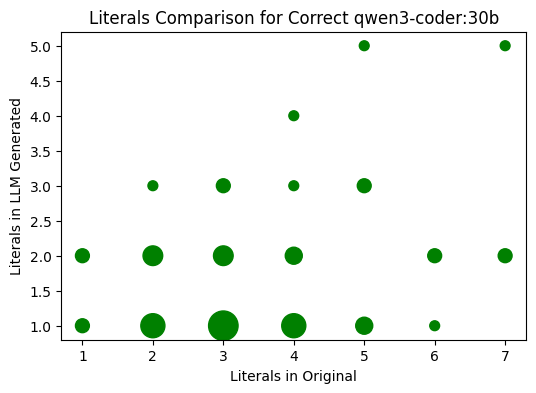

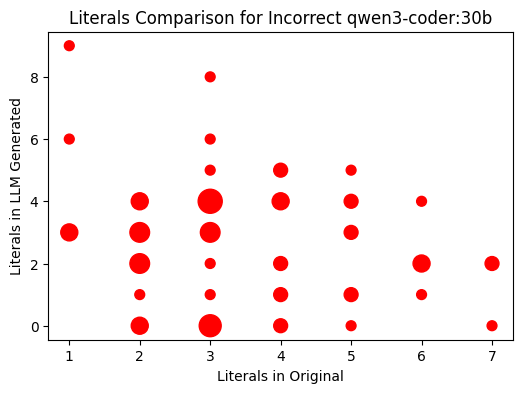

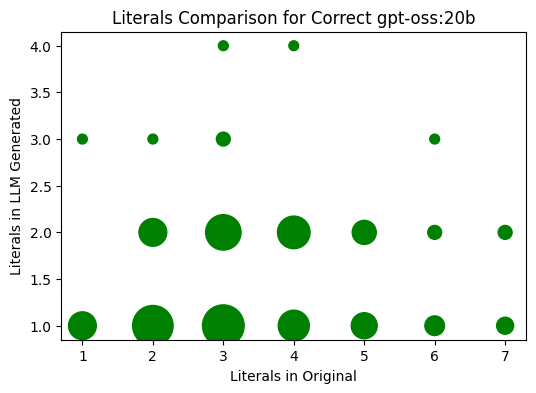

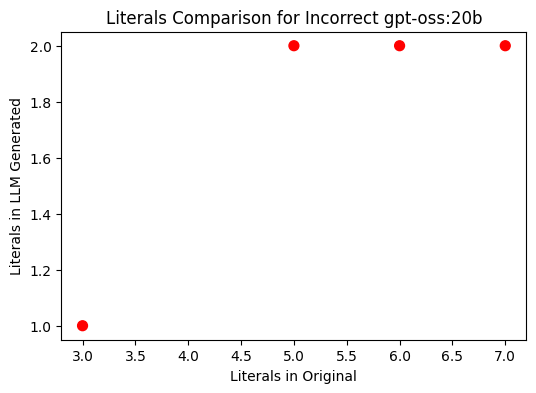

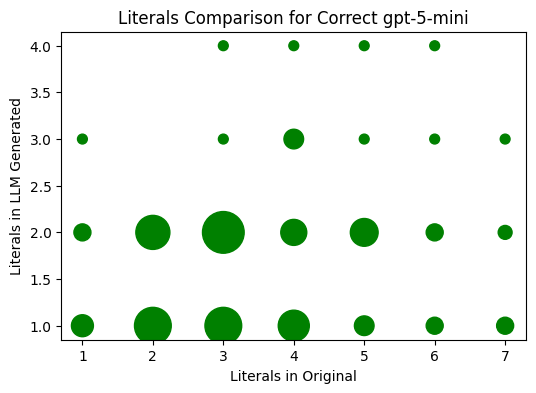

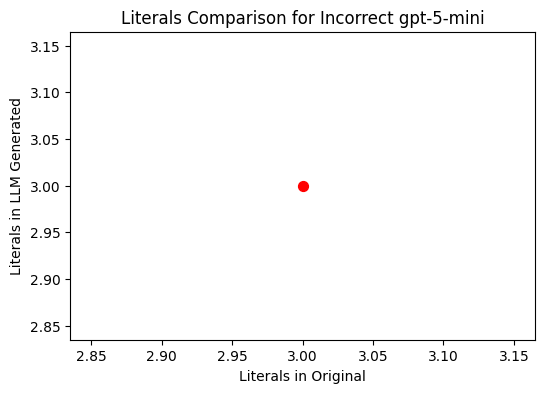

In [6]:
# Benchmark: benchmark_name_llm: qwen3-coder:30b
# Color: solution_match: True

for benchmark in set(literal_effects["benchmark_name_llm"]):

    for status in [True, False]:

        filtered = literal_effects[((literal_effects["solution_match"]) == status) & (literal_effects["benchmark_name_llm"] == benchmark)]

        # Y: num_literals_original
        # X: num_literals_llm
        # Size: count

        status_str = "Correct" if status else "Incorrect"

        plt.figure(figsize=(6,4))
        plt.scatter(x=filtered["num_literals_original"], y=filtered["num_literals_llm"], s=filtered["count"] * 50, c="green" if status else "red")
        plt.xlabel("Literals in Original")
        plt.ylabel("Literals in LLM Generated")
        plt.title(f"Literals Comparison for {status_str} {benchmark}")
        plt.savefig(f"paper/generate/diagrams/{status_str}_{benchmark}.pdf") 


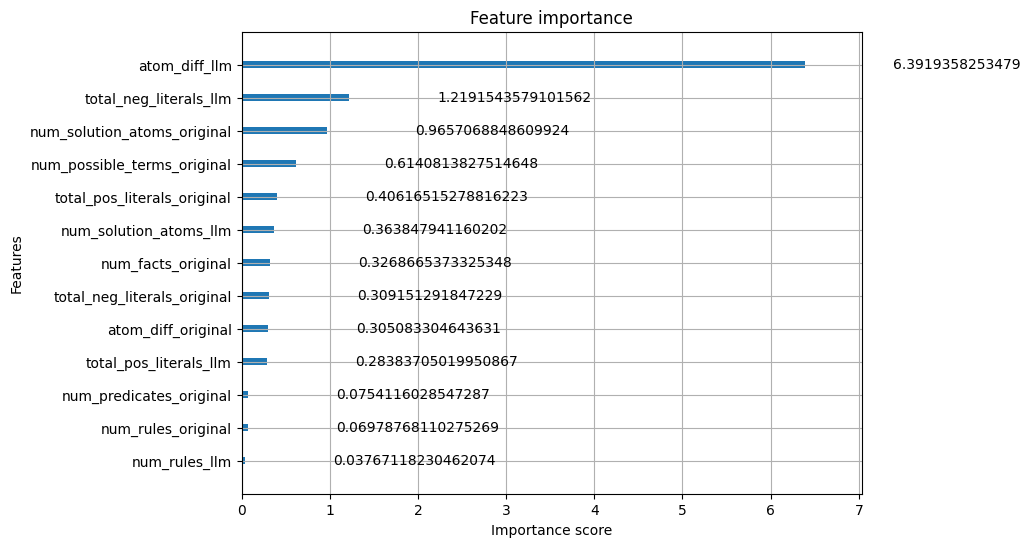

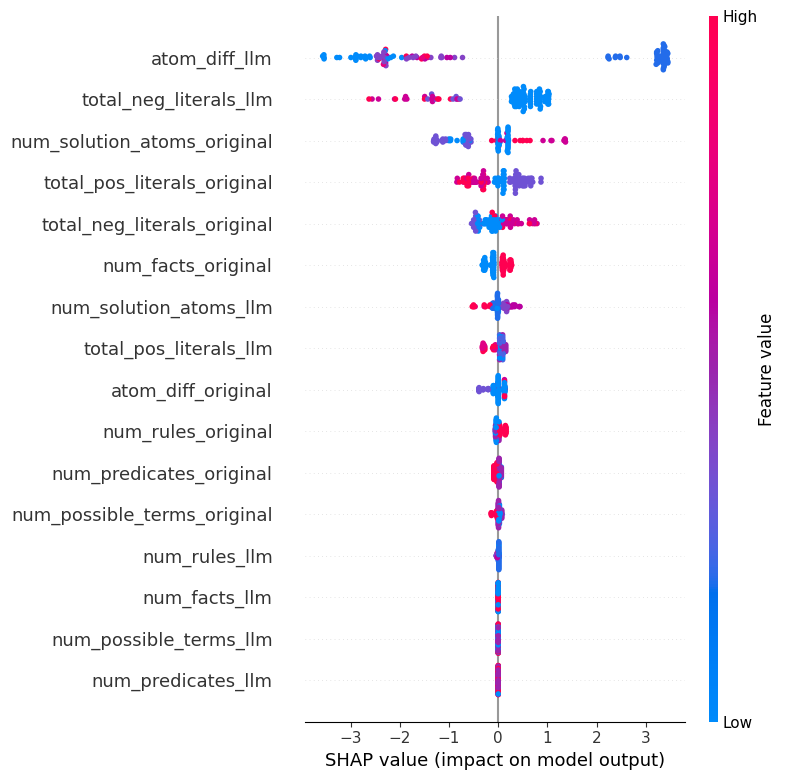

In [13]:

import xgboost as xgb
from xgboost import XGBClassifier
import shap

filtered = stats[(stats["benchmark_name_llm"] == "qwen3-coder:30b")]

# num_solution_atoms_original
# num_solution_atoms_llm

X = filtered[[
    "num_predicates_original",
    "num_possible_terms_original",
    "num_facts_original",
    "num_rules_original",
    "total_pos_literals_original",
    "total_neg_literals_original",
    "num_predicates_llm",
    "num_possible_terms_llm",
    "num_facts_llm",
    "num_rules_llm",
    "total_pos_literals_llm",
    "total_neg_literals_llm",
    "num_solution_atoms_original",
    "num_solution_atoms_llm",
]].copy()

X["num_solution_atoms_original"] = filtered["num_solution_atoms_original"]
X["num_solution_atoms_llm"] = filtered["num_solution_atoms_llm"] 

X["atom_diff_original"] = X["num_solution_atoms_original"] - X["num_facts_original"]

# Highest feature importance, as if the generated
X["atom_diff_llm"] = X["num_solution_atoms_llm"] - X["num_facts_llm"]

y = filtered['solution_match']

# Train model
model = XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.05)
model.fit(X, y)

# XGB importance
fig, ax = plt.subplots(figsize=(8, 6))
xgb.plot_importance(model, importance_type='gain', ax=ax)
fig.savefig("paper/generate/diagrams/xgb_importance.pdf", bbox_inches="tight")
plt.show()

# SHAP importance
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# shap.summary_plot(shap_values, X)

plt.rcParams["figure.figsize"] = (8, 6)
shap.summary_plot(shap_values, X, show=False)
plt.savefig("paper/generate/diagrams/shap.pdf", dpi=300, bbox_inches="tight")
plt.show()